# **IMPORT STATEMENT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

# **DATA EXPLORATION**

In [ ]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **DATA DISTRIBUTION**

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

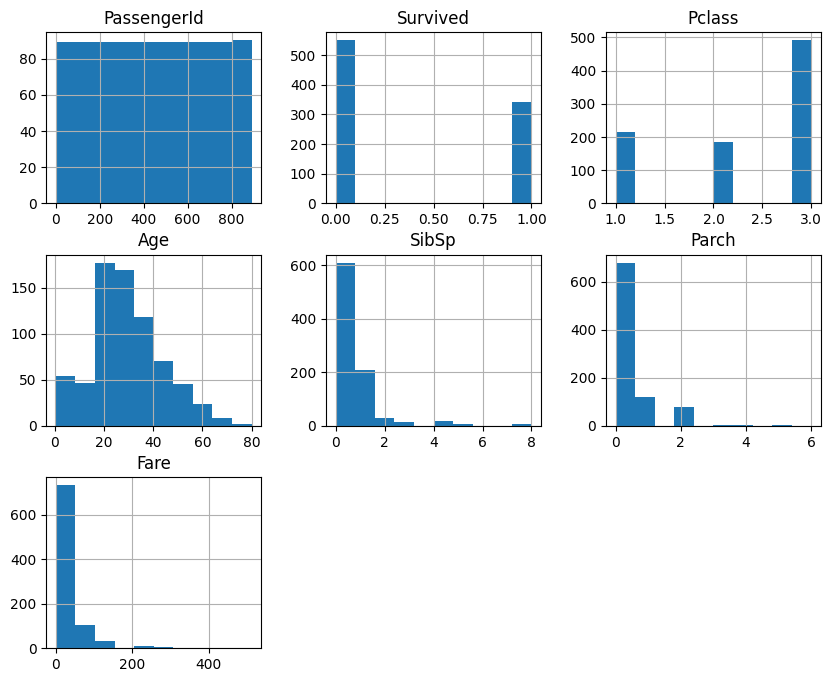

In [ ]:
data.hist(bins=10,figsize=(10,8))

# **CORELATION MATRIX**

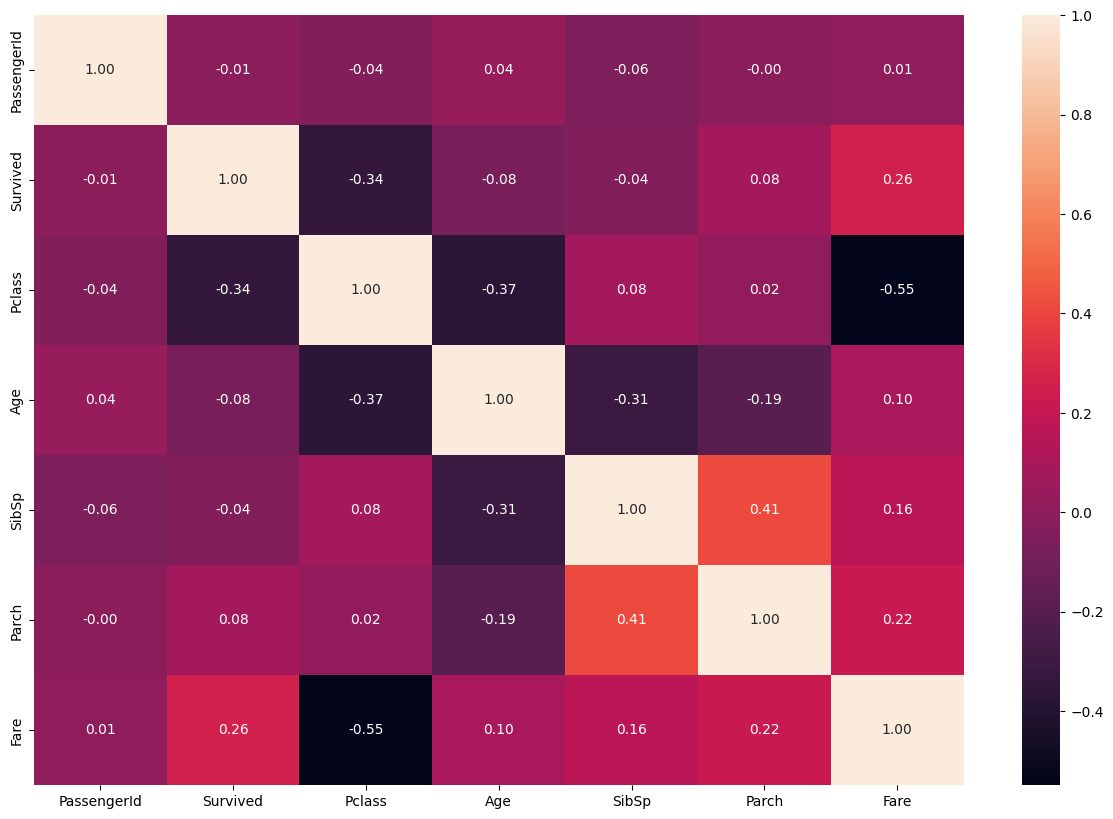

In [ ]:
# Compute correlation matrix
corr_matrix = data.drop(columns=["Name","Ticket","Cabin","Sex","Embarked"]).corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# **FEATURE ANALYSIS**

In [ ]:
#target for prediction
target=data["Survived"]

#features for prediction
features=data.drop(columns=['PassengerId',"Survived","Name"]) # removed passengerId and Name since they are irrelevent for prediction
features.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
categorical_features=['Sex','Ticket','Cabin','Embarked']
numerical_features=['Pclass','Age','SibSp','Parch','Fare']

# **DATA CLEANING**

**Remove Null Values and Handle Categorical Data**

In [ ]:
# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
X_train_processed = preprocessor.fit_transform(features)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=features.columns)
X_train_processed_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1.0,523.0,47.0,2.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0.0,596.0,81.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0.0,669.0,47.0,2.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0.0,49.0,55.0,2.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1.0,472.0,47.0,2.0


**Spliting dataset into test and train**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_processed_df, target, test_size=0.3, random_state=42) # 70-30 train-test split

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (623, 9)
y_train shape: (623,)
X_test shape: (268, 9)
y_test shape: (268,)


# **Finding The Best Model For Analysis**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
# Initialize a list to store the results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred, output_dict=True)  # Generate classification report
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1-Score_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1-Score_1': report['1']['f1-score']
    })

In [ ]:
output = pd.DataFrame(results)
print(output)

                 Model  Accuracy  Precision_0  Recall_0  F1-Score_0  \
0  Logistic Regression  0.809701     0.815476  0.872611    0.843077   
1        Decision Tree  0.738806     0.777070  0.777070    0.777070   
2        Random Forest  0.794776     0.793103  0.878981    0.833837   
3    Gradient Boosting  0.817164     0.796703  0.923567    0.855457   
4              XGBoost  0.798507     0.797688  0.878981    0.836364   

   Precision_1  Recall_1  F1-Score_1  
0     0.800000  0.720721    0.758294  
1     0.684685  0.684685    0.684685  
2     0.797872  0.675676    0.731707  
3     0.860465  0.666667    0.751269  
4     0.800000  0.684685    0.737864  


In [ ]:
# Choose one of the trees to visualize (e.g., the first tree)
estimator = models['Gradient Boosting'].estimators_[0, 0]

# Export the tree to DOT format
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=features.columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to render the DOT file and display it
graph = graphviz.Source(dot_data)
graph.render("gradient_boosting_tree",format="png")  # This will save the tree visualization to a file

'gradient_boosting_tree.png'

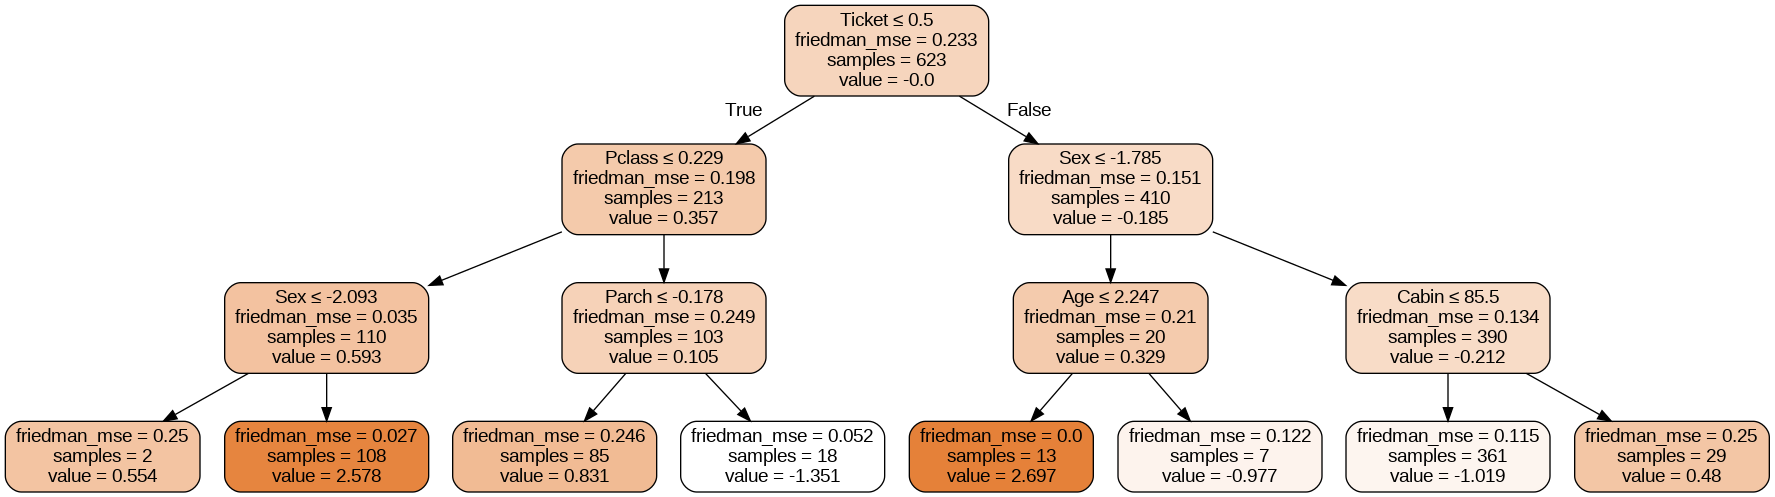

In [ ]:
Image(filename="gradient_boosting_tree.png")

# **Prediction**

In [ ]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_submission = test_data.drop(columns=["PassengerId","Name"])  # Drop 'id' and name column

X_train_processed = preprocessor.fit_transform(X_submission)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=features.columns)

# Prediction on test data using Gradient Boosting Classifier
predictions = models['Gradient Boosting'].predict(X_train_processed_df)

#Mapping the Values Back to Strings
submission_df = pd.DataFrame({"PassengerId": test_data["PassengerId"], 'Survived': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print(submission_df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
